In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets , layers, models , regularizers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras import regularizers


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

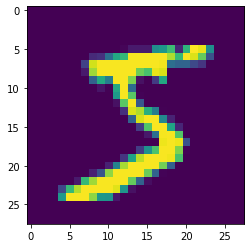

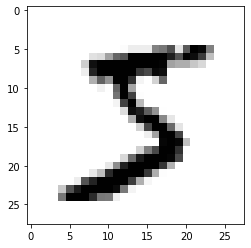

In [5]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
x_train = x_train / 255

In [8]:
x_test = x_test / 255

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
img_size = 28
x_train = np.array(x_train).reshape(-1 , img_size , img_size , 1)
x_test = np.array(x_test).reshape(-1 , img_size  ,img_size , 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [69]:
model = Sequential()


model.add(Conv2D (32 ,(3,3) ,kernel_regularizer=regularizers.l2(0.0001), input_shape = x_train.shape [1: ]))
model.add(Activation ( "relu" ))
model.add(MaxPooling2D (pool_size = (2,2)))

model.add(Conv2D (64 ,(3,3),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation ( "relu" ))
model.add(MaxPooling2D (pool_size = (2,2)))

model.add(Conv2D (64 ,(3,3),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation ( "relu" ))
model.add(MaxPooling2D (pool_size = (2,2)))

model.add (Flatten())
model.add (Dense (64))
model.add (Activation ("relu"))

model.add (Dense (32))
model.add (Activation ("relu"))

model.add (Dense (10))
model.add (Activation ("softmax"))




In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_22 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)         

In [71]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', 
              metrics=['accuracy'])
model.optimizer.lr=0.001

In [72]:
hist = model.fit (x_train , y_train , batch_size = 128 , epochs = 5)

Epoch 1/5
469/469 [==============================] - 13s 28ms/step - loss: 0.4025 - accuracy: 0.8778
Epoch 2/5
469/469 [==============================] - 13s 29ms/step - loss: 0.1301 - accuracy: 0.9648
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1005 - accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0847 - accuracy: 0.9791
Epoch 5/5
469/469 [==============================] - 13s 29ms/step - loss: 0.0755 - accuracy: 0.9825


In [73]:
model.evaluate(x_test , y_test )

313/313 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.9806


[0.08100221306085587, 0.9805999994277954]

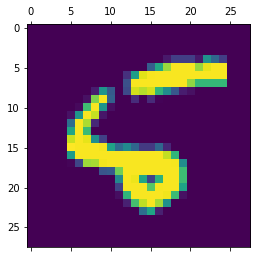

In [74]:
plt.matshow(x_test[8])

In [75]:
y_predicted = model.predict(x_test)

In [76]:
np.argmax(y_predicted[8])

5

In [77]:
y_test[8]

5

In [78]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [79]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    3,    0,    0,    3,    6,    3,    1,    8],
       [   0, 1128,    2,    1,    0,    1,    0,    3,    0,    0],
       [   2,    0, 1002,    7,    3,    0,    1,   14,    2,    1],
       [   0,    1,    1, 1002,    0,    3,    0,    1,    1,    1],
       [   1,    0,    2,    0,  953,    0,    0,    0,    0,   26],
       [   1,    0,    0,    6,    0,  876,    1,    1,    0,    7],
       [   3,    3,    0,    0,    4,    6,  939,    0,    1,    2],
       [   0,    1,   10,    1,    0,    1,    0, 1010,    1,    4],
       [   0,    1,    1,    2,    2,    1,    0,    3,  936,   28],
       [   1,    0,    0,    1,    1,    1,    0,    1,    0, 1004]])>

Text(69.0, 0.5, 'Truth')

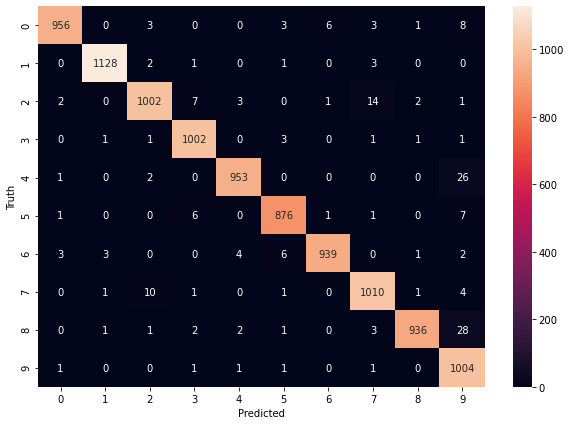

In [80]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
train_loss = hist.history['loss']
xc=range(5)

Text(0, 0.5, 'loss')

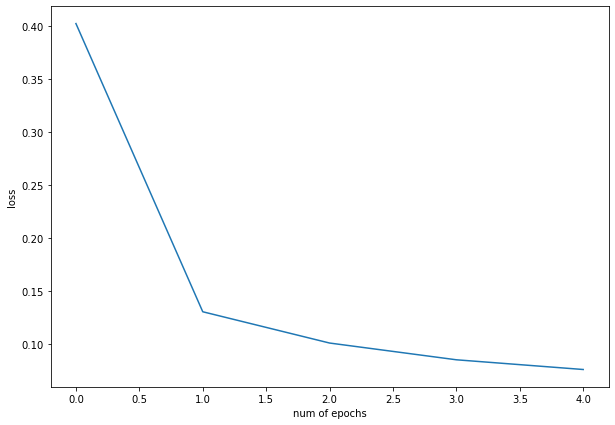

In [82]:
plt.figure(figsize = (10,7))
plt.plot(xc , train_loss)
plt.xlabel('num of epochs')
plt.ylabel('loss')